<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/Classification_NN_Dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, shutil
from keras import layers,models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from keras.applications import VGG16

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#%cd /gdrive
#os.getcwd()
#os.listdir()
os.chdir('/gdrive/My Drive/colab_datasets/cat_dog')

In [2]:
os.getcwd()

'/content'

In [0]:
original_dataset_dir = '/gdrive/My Drive/colab_datasets/cat_dog'
base_dir = '/gdrive/My Drive/colab_datasets/base_dir'
#os.mkdir(base_dir)
train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
#os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
#os.mkdir(train_cats_dir)
#os.mkdir(train_dogs_dir)

In [0]:
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
#os.mkdir(validation_cats_dir)
#os.mkdir(validation_dogs_dir)

In [0]:
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')
#os.mkdir(test_cats_dir)
#os.mkdir(test_dogs_dir)

In [0]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [49]:
#fnames[:10]

['cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg',
 'cat.10.jpg']

In [0]:
'''
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)
  '''

In [0]:
'''
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)
'''  

In [0]:
'''fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)
  '''

In [0]:
'''fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)'''
  

In [0]:
'''fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)'''

In [0]:
'''fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)'''

In [0]:
'''shutil.copyfile('/gdrive/My Drive/colab_datasets/cat_dog/cat.0.jpg','/gdrive/My Drive/colab_datasets/base_dir/train/cats/cat.0.jpg')
   shutil.copyfile('/gdrive/My Drive/colab_datasets/cat_dog/dog.0.jpg','/gdrive/My Drive/colab_datasets/base_dir/train/dogs/dog.0.jpg')
'''   

In [9]:
print('Total no of training cats',len(os.listdir(train_cats_dir)))
print('Total no of validation cats',len(os.listdir(validation_cats_dir)))
print('Total no of test cats',len(os.listdir(test_cats_dir)))
print('Total no of training dog',len(os.listdir(train_dogs_dir)))
print('Total no of validation dogs',len(os.listdir(validation_dogs_dir)))
print('Total no of test dogs',len(os.listdir(test_dogs_dir)))


Total no of training cats 1000
Total no of validation cats 500
Total no of test cats 500
Total no of training dog 1000
Total no of validation dogs 500
Total no of test dogs 500


Network Creation - Convnet

In [63]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

W0617 04:22:49.972796 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 04:22:50.024877 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 04:22:50.035111 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 04:22:50.080311 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [65]:
###Printing the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [66]:
###Compiling the network

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4),metrics=['acc'])

W0617 04:25:58.792720 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 04:25:58.801005 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0617 04:25:58.807543 139836576929664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [67]:
###As you know, we need to feed in the tensor data to the Deep NNs, we need to conver the images to Tensors. Luckily keras
###provides a package which does it for us.

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size = 20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size = 20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [74]:
###While pulling the data from generator, please see that it generates batches of 20 tensors of shape (150,150,3). The output
###is a tuple of data and label.

for index,item in enumerate(train_generator):
  if index == 0 :
    print('data shape: ',item[0].shape)
    print('label shape:',item[1].shape)
  else:
    break

data shape:  (20, 150, 150, 3)
label shape: (20,)


In [76]:
##Fitting the model from the fit_generator method, which will take batches of data. We will specify who many batches for
##one epoch, after which the gradient descent will kcik in. We can do the same with validation data set as well.
'''
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                             validation_data = validation_generator,validation_steps=50)
                             '''

W0617 04:42:04.756911 139836576929664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 114s 1s/step - loss: 0.6871 - acc: 0.5365 - val_loss: 0.6675 - val_acc: 0.6080
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.6523 - acc: 0.6170 - val_loss: 0.6293 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 112s 1s/step - loss: 0.6007 - acc: 0.6610 - val_loss: 0.6129 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.5639 - acc: 0.7010 - val_loss: 0.5943 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5274 - acc: 0.7410 - val_loss: 0.5906 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.5063 - acc: 0.7575 - val_loss: 0.5842 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.4799 - acc: 0.7715 - val_loss: 0.6205 - val_acc: 0.6640
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

In [0]:
#os.getcwd()
#model_dir = os.path.join(base_dir,'saved_model')
#os.mkdir(model_dir)
#os.chdir(model_dir)
#os.getcwd()
model.save('cats_and_dogs_1.h5')


Lets visualize our Training and Validation Accuracy and Losses

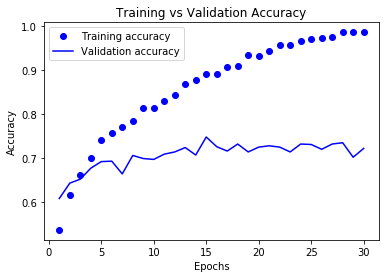

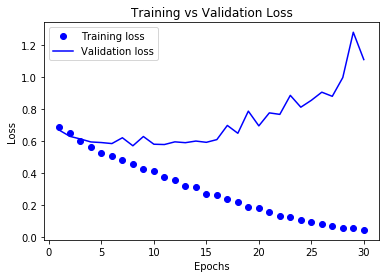

In [83]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# **Accuracy Achieved - 72%**

We see that after 5 epochs, the validation loss starts increasing and validation accuracy starts decreasing. The best accuracy we get here is close to 70% and the best loss is close to ~0.6

This is a typical case of overfitting and we need to do regularization. We have various techniques for that, like Dropout layers, L2 regulerisation(Weight decay). But next we would use Data augmentation which is universally used in Computer Vision problems

Here data augmentation will take the original images and will perform various operations on it like Rotate, width shift, height shift, sheer, zoom etc to make new input data. This increases the input data and we get better generalized model which works better on the validation data.

In [0]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')


Now lets display few images which are newly created through Data Augmentation

In [11]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in datagen.flow(x,batch_size= 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i % 4 == 0:
    break
plt.show()

NameError: ignored

Now lets add drop out layer to tackle overfitting 

In [13]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3),activation='relu', input_shape = (150,150,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))



W0618 00:42:48.440403 140274993592192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 00:42:48.491289 140274993592192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 00:42:48.500118 140274993592192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 00:42:48.555341 140274993592192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 00:42:48.614523 140274993592192 deprecation_wrapp

In [14]:
from keras import optimizers
model2.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4),metrics=['acc'])


W0618 00:42:53.524114 140274993592192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 00:42:53.532595 140274993592192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0618 00:42:53.539227 140274993592192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip = True, 
                                  )
test_datagen =       ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size = (150,150),batch_size=32,class_mode='binary' )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model2.fit_generator(train_generator,steps_per_epoch = 50, epochs=100,validation_data = validation_generator, validation_steps= 50 )
model2.save('cats_and_dogs_2.h5')

Epoch 1/100
50/50 [==============================] - 930s 19s/step - loss: 0.6956 - acc: 0.5006 - val_loss: 0.6877 - val_acc: 0.5070
Epoch 2/100
50/50 [==============================] - 127s 3s/step - loss: 0.6917 - acc: 0.5318 - val_loss: 0.6824 - val_acc: 0.6089
Epoch 3/100
50/50 [==============================] - 106s 2s/step - loss: 0.6880 - acc: 0.5531 - val_loss: 0.6739 - val_acc: 0.5920
Epoch 4/100
50/50 [==============================] - 104s 2s/step - loss: 0.6760 - acc: 0.5675 - val_loss: 0.6559 - val_acc: 0.6044
Epoch 5/100
50/50 [==============================] - 105s 2s/step - loss: 0.6749 - acc: 0.5894 - val_loss: 0.6583 - val_acc: 0.5977
Epoch 6/100
50/50 [==============================] - 104s 2s/step - loss: 0.6636 - acc: 0.5931 - val_loss: 0.6691 - val_acc: 0.5702
Epoch 7/100
50/50 [==============================] - 103s 2s/step - loss: 0.6601 - acc: 0.6006 - val_loss: 0.7467 - val_acc: 0.5076
Epoch 8/100
50/50 [==============================] - 103s 2s/step - loss: 0

In [0]:
#os.getcwd()
#os.chdir('/gdrive/My Drive/colab_datasets/base_dir/saved_model')
model2.save('cats_and_dogs_2.h5')


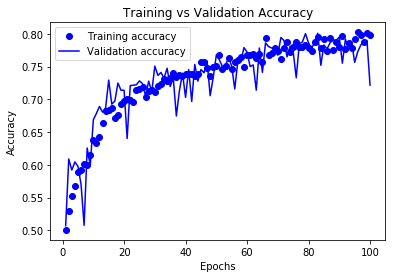

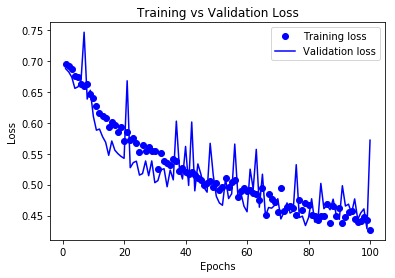

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# **Accuracy Achieved - 80%**

We see that, what does using dropout layer do to our model fitting. See how closely, the Training and validation losses and Accuracy clings. Which is a great sign, as we have got rid of Overfitting, However this is still not the best performance we can get. We have received approximately 80% accuracy after 100 epochs. Also, would like to add that the training time has increased significantly after adding the drop out layer, It took me close to 2.5 hours to train this network.

What are our next steps to increase the accuracy without overfitting:
So far we have been training a network from scratch. Now we are going to try a Pretrained model which has been already trained on similar kind of class images. Here we have two options:
1. Either we take the existing model, Use its convolutional layer, predict the output , feed it in our own dense layer and predict the final classes, But wait here we cant use the Data augmentation as the existing model will go through input images only once.
2. Second method is to make a combined model with Convolutional layer of existing model and our own Dense layer. We can use Data Augmentation in this case as we have one big model combining both.

### **Lets check out Step 1**

Here we will use VGG16 architecture, which has been trained in Imagenet dataset which does include animal images as input so we should get some useful features extracted from the same. We will then use them as input features for our Dense layers.

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))

Note, Here we mentioned for weights, imagenet weight checkpoint to initialize the weights. We said include_top as False to not consider the dense layers in top, so that we can get the output of the convolutional layers only. and then mentioned th input shape of our images.

In [27]:
VGG16().summary()

553467904/553467096 [==============================] - 6s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

In [28]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

If you can see, there are two major differences in the original trained model summary and our model. The input shape is different and the Dense layers are absent in our model.

Now for feature extraction and converting them into batches of data to feed in our Dense layer, we will need to create a generator, which will pick up sample with batch size from ImageDataGenerator, feeds that into the Pretrained model, get the batch of output features and then makes it available for our Dense layer model

In [0]:
datagen = ImageDataGenerator(rescale = 1./255)
def extract_features(directory, sample_size):
  features = np.zeros(shape = (sample_size, 4,4,512)) ## Since we see in our model above, the output shape is 4,4,512
  labels   = np.zeros(shape = (sample_size))
  generator = datagen.flow_from_directory (directory, target_size = (150,150), batch_size = 20 , class_mode = 'binary')
  i = 0 
  for feature_batch, label_batch in generator:
    features[i* 20 : (i+1) * 20] = conv_base.predict(feature_batch)
    labels[i* 20 : (i+1) * 20] = label_batch
    i +=1
    if i*20 >= sample_size:
      break
  return features, labels
  

In [37]:
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now we need to flatten this layer output 

In [0]:
train_features = np.reshape(train_features, (2000 , 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000 , 4 * 4 * 512))
test_features = np.reshape(test_features, (1000 , 4 * 4 * 512))

In [50]:
print(train_features.shape)
print(validation_features.shape)
print(test_features.shape)

(2000, 8192)
(1000, 8192)
(1000, 8192)


Now we are going to add our Model with Dense layers and feed these features into that.

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim = (4*4*512)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5), metrics=['acc'])


In [40]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model3.fit(train_features, train_labels, epochs=30, batch_size = 20,
                     validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6047 - acc: 0.6720 - val_loss: 0.4642 - val_acc: 0.7820
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4254 - acc: 0.8050 - val_loss: 0.3688 - val_acc: 0.8420
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3587 - acc: 0.8485 - val_loss: 0.3199 - val_acc: 0.8700
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3186 - acc: 0.8675 - val_loss: 0.2962 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2766 - acc: 0.8915 - val_loss: 0.2810 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2617 - acc: 0.8985 - val_loss: 0.2831 - val_acc: 0.8790
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2470 - acc: 0.8970 - val_loss: 0.2624 - val_acc: 0.8940
Epoch 8/30
200

In [0]:
#os.getcwd()
#os.chdir('/gdrive/My Drive/colab_datasets/base_dir/saved_model')
model3.save('cats_and_dogs_3.h5')

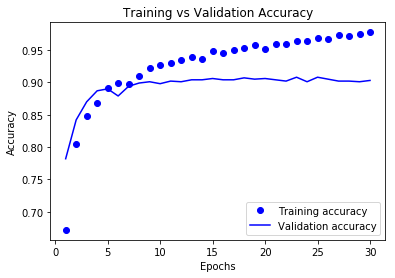

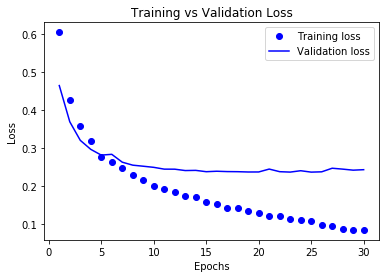

In [53]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# ***Accuracy Achived - 90%***

###**Next Step :  Step 2 : Will Build one model with Pretrained model's convolutional layer and our Dense layer
### We can use Data Augmentation with this approach **

In [10]:
conv_base = VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256,activation = 'relu'))
model4.add(layers.Dense(1,activation = 'sigmoid'))

W0619 03:21:35.991194 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 03:21:36.063498 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 03:21:36.077652 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 03:21:36.150031 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 2s 0us/step


W0619 03:21:39.188840 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 03:21:39.190333 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [11]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


###**Now one thing to give heed towards is the number of trainable weights are 16Mn. We need to make sure that the weights of Conv_base doesnt get updated. As we dont want that. We can freeze those weigths by setting the model.trainable = False, 
Lets see that happening **

In [12]:
print('Trainable weights before freezing', len(model4.trainable_weights))
conv_base.trainable = False
print('Trainable weights after freezing', len(model4.trainable_weights))

Trainable weights before freezing 30
Trainable weights after freezing 4


In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range = 40, width_shift_range = 0.2,
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2,
                                   horizontal_flip = True, fill_mode = 'nearest'
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, target_size = (150,150), class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, target_size = (150,150), class_mode = 'binary')

model4.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5), metrics = ['acc'])

Found 2000 images belonging to 2 classes.


W0619 03:22:05.398960 139994646865792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 03:22:05.413228 139994646865792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 1000 images belonging to 2 classes.


In [14]:
history = model4.fit_generator(train_generator, steps_per_epoch = 100, epochs = 20 ,
                              validation_data = validation_generator, validation_steps = 50)


Epoch 1/20
100/100 [==============================] - 861s 9s/step - loss: 0.5719 - acc: 0.7215 - val_loss: 0.4531 - val_acc: 0.8100
Epoch 2/20
100/100 [==============================] - 670s 7s/step - loss: 0.4803 - acc: 0.7850 - val_loss: 0.3703 - val_acc: 0.8510
Epoch 3/20
100/100 [==============================] - 671s 7s/step - loss: 0.4313 - acc: 0.8105 - val_loss: 0.3266 - val_acc: 0.8740
Epoch 4/20
100/100 [==============================] - 671s 7s/step - loss: 0.4152 - acc: 0.8160 - val_loss: 0.3253 - val_acc: 0.8590
Epoch 5/20
100/100 [==============================] - 670s 7s/step - loss: 0.3763 - acc: 0.8415 - val_loss: 0.3204 - val_acc: 0.8600
Epoch 6/20
100/100 [==============================] - 668s 7s/step - loss: 0.3671 - acc: 0.8395 - val_loss: 0.2802 - val_acc: 0.8910
Epoch 7/20
100/100 [==============================] - 667s 7s/step - loss: 0.3536 - acc: 0.8505 - val_loss: 0.2756 - val_acc: 0.8850
Epoch 8/20
100/100 [==============================] - 670s 7s/step - 

In [0]:
model4.save('cats_and_dogs_4.h5')

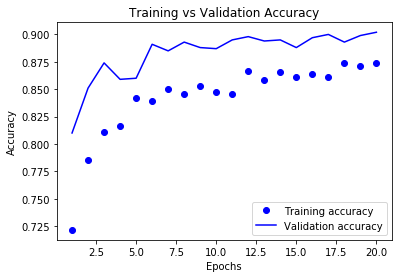

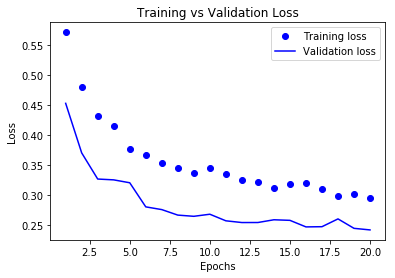

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()